📝 Project: Classification on Purchase Prediction Dataset
In this project, we work with a real-world dataset related to customer purchase behavior. The dataset includes demographic information such as Age and Estimated Salary, along with a target variable, Purchased, which indicates whether a customer made a purchase or not.

Our goal is to build a complete machine learning pipeline—from data exploration and preprocessing to model building and evaluation—to classify whether a customer is likely to make a purchase.

🎯 Objective
The main objective is to build and compare the performance of multiple machine learning models to accurately predict the purchase status (Purchase or No Purchase). This classification helps businesses assess customer intent and design targeted marketing campaigns and personalized offers.

🔍 Dataset Columns
- Age – Age of the customer

- EstimatedSalary – Annual salary estimate

- Purchased – Target variable (1 = Purchased, 0 = Not Purchased)

🤖 Models Evaluated
- Logistic Regression

- KNN

- Naive Bayes

- Decision Tree

- Random Forest

- AdaBoost

- XGBoost

📊 Evaluation Metrics
To evaluate model performance, we use the following metrics:

- Accuracy – Proportion of total correct predictions

- Precision – Proportion of positive predictions that were correct

- Recall – Proportion of actual purchases correctly identified

- F1 Score – Balance between precision and recall

- Confusion Matrix – Visual representation of prediction results

Outcome
By comparing these evaluation metrics, we aim to:

Select the most accurate and robust model for purchase classification

Gain insights into which factors (age and salary) influence purchase decisions

Help businesses optimize their customer engagement strategies based on predicted purchase behavior

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S7/Classification/purchase.csv")

In [3]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
data.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


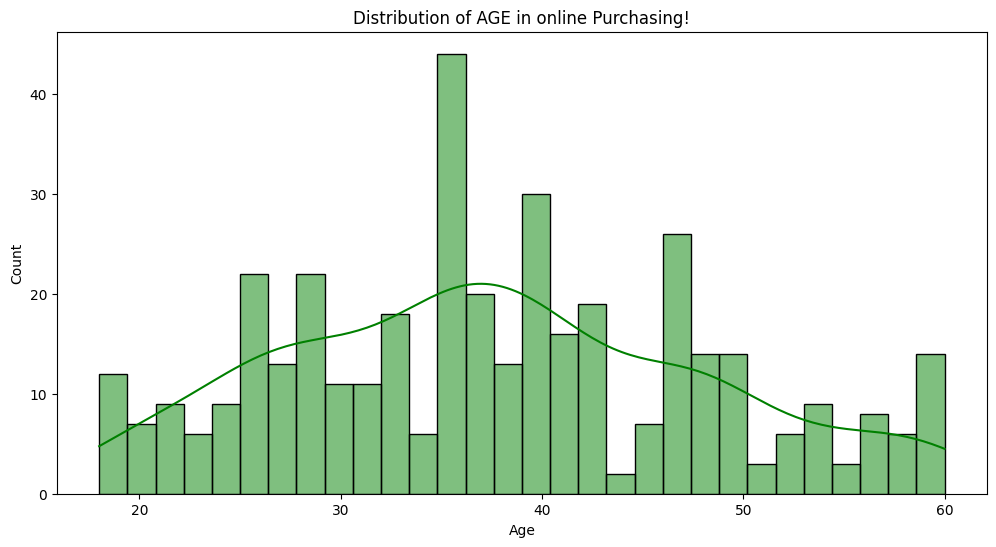

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data['Age'], bins = 30, kde= True, color = 'green')
plt.title('Distribution of AGE in online Purchasing!')
plt.show()

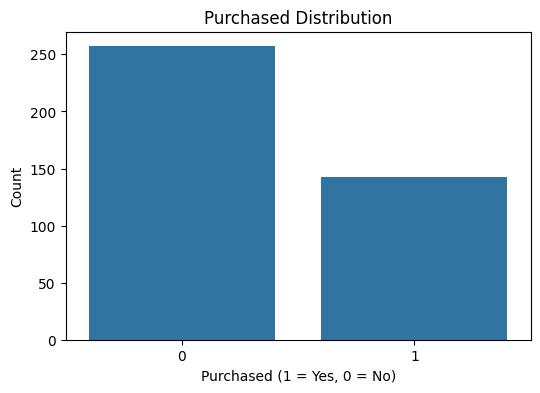

In [7]:
# plot claim status distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Purchased', data=data)
plt.title('Purchased Distribution')
plt.xlabel('Purchased (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

The people who are purchasing is less.

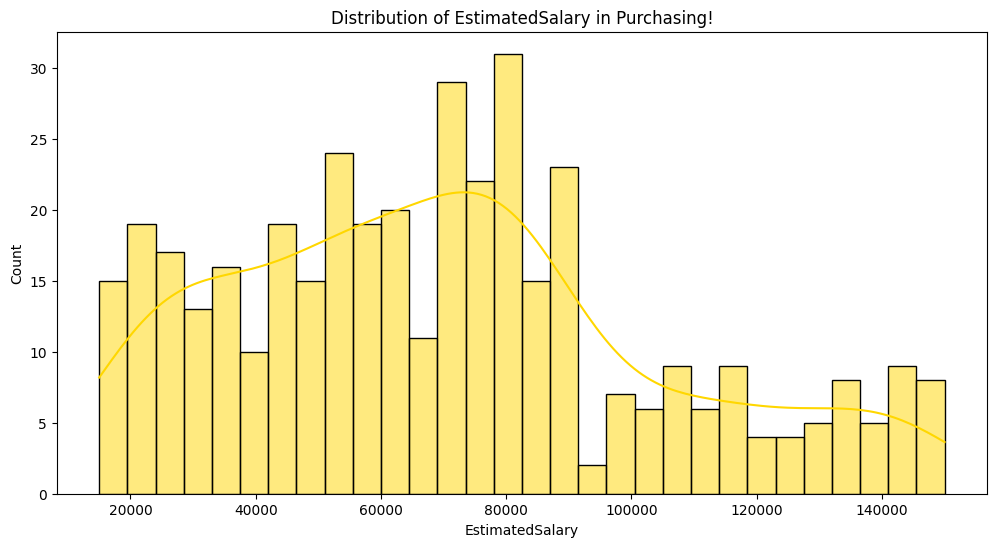

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data['EstimatedSalary'], bins = 30, kde= True, color = 'gold')
plt.title('Distribution of EstimatedSalary in Purchasing!')
plt.show()

More People are having salary less than 90k

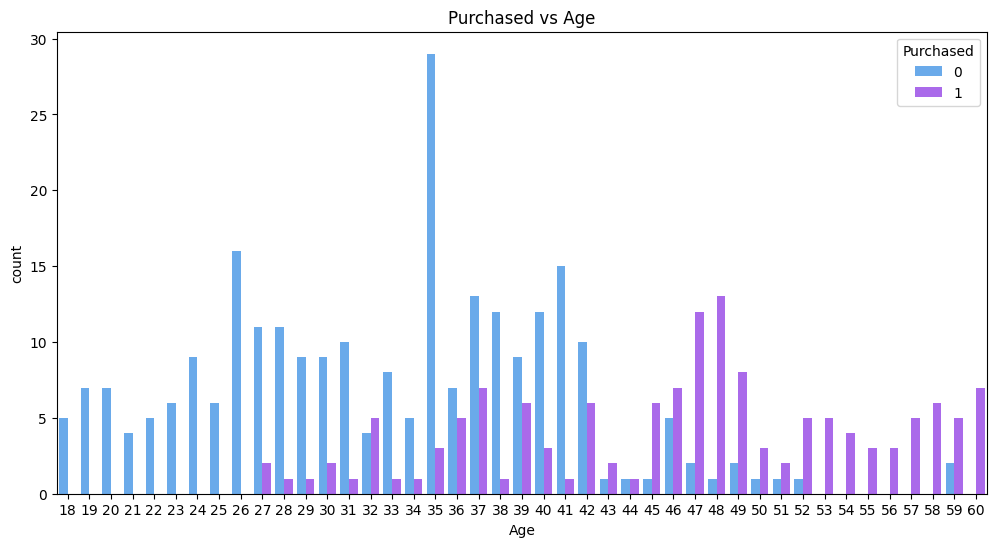

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Age', hue='Purchased', palette = 'cool')
plt.title("Purchased vs Age")
plt.legend(title="Purchased")
plt.show()

People having age greater than 27 tends to buy more

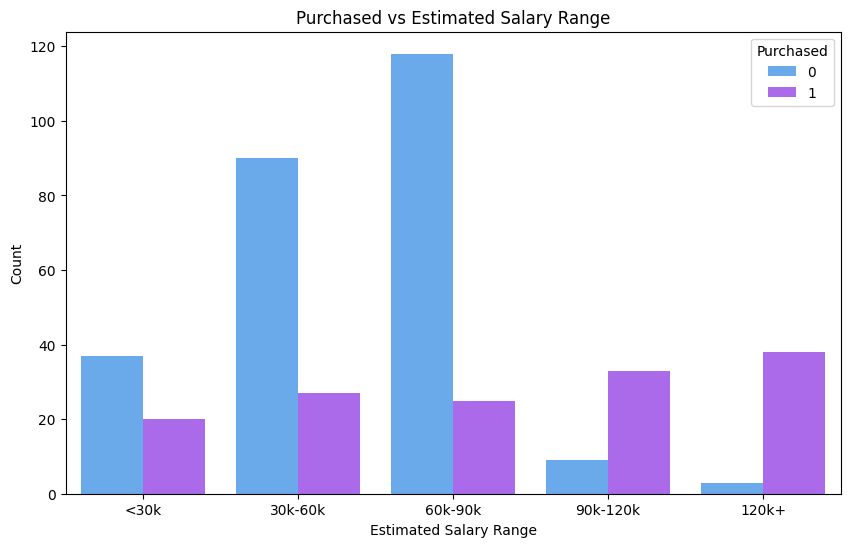

In [16]:
# Create salary bins
bins = [0, 30000, 60000, 90000, 120000, 150000]
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+']
data['SalaryRange'] = pd.cut(data['EstimatedSalary'], bins=bins, labels=labels)

# Plot countplot with binned salary
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SalaryRange', hue='Purchased', palette='cool')
plt.title("Purchased vs Estimated Salary Range")
plt.xlabel("Estimated Salary Range")
plt.ylabel("Count")
plt.legend(title="Purchased")
plt.show()


Customers with higher estimated salaries (e.g., >90k) are more likely to purchase.

In lower salary ranges (<60k), the majority tend to not purchase.

In [6]:
X=data.drop('Purchased',axis=1)
y=data['Purchased']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (320, 2)
Shape of test dataset :  (80, 2)


# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8875
[[50  2]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.825
[[46  6]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80



# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.925
Confusion Matrix:
 [[50  2]
 [ 4 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.92      0.86      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.91      0.92        80
weighted avg       0.92      0.93      0.92        80



# SVM

In [12]:
#kernel=rbf
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', random_state=42)  # 'rbf' is good for non-linear problems
svm_rbf.fit(X_train, y_train)

y_pred_svm = svm_rbf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7375
Confusion Matrix:
 [[49  3]
 [18 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80



# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8375
Confusion Matrix:
 [[46  6]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9
Confusion Matrix:
 [[46  6]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



# Adaboost

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.9125
Confusion Matrix:
 [[50  2]
 [ 5 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.92      0.82      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.89      0.90        80
weighted avg       0.91      0.91      0.91        80



# Hyperparameter tuning with GridSearchCv

In [16]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best XGB Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best XGB Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best CV Score: 0.9125


# XGBoost

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,
    eval_metric='logloss',
    random_state=42
)

best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)

print("Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


Final XGBoost Accuracy: 0.9125
Confusion Matrix:
 [[47  5]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



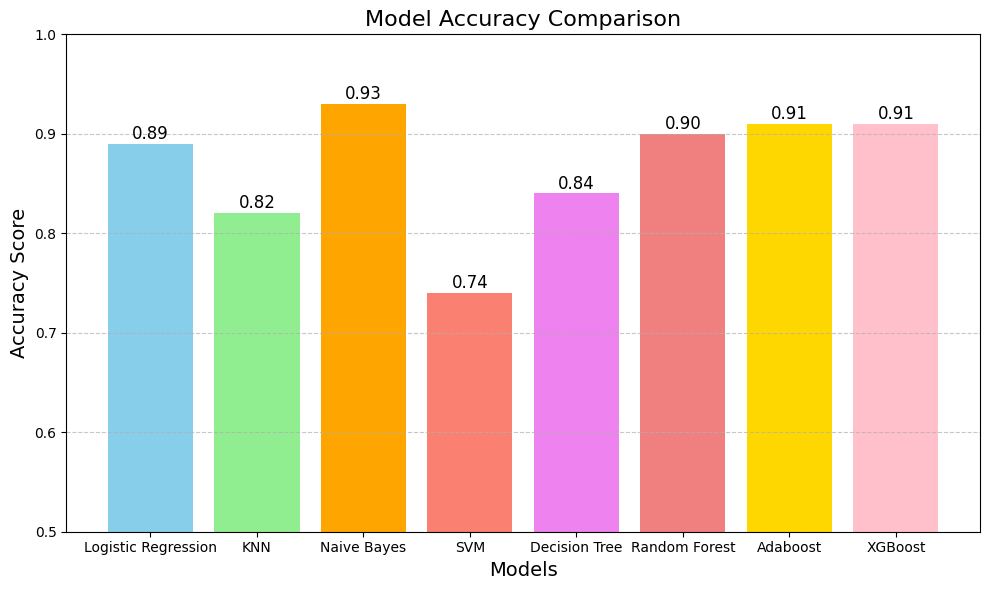

In [19]:

import matplotlib.pyplot as plt

# Accuracy scores
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes','SVM','Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost']
accuracy_scores = [0.89, 0.82, 0.93, 0.74, 0.84, 0.90, 0.91, 0.91]

# Add a color for each model
colors = ['skyblue', 'lightgreen', 'orange', 'salmon', 'violet', 'lightcoral', 'gold', 'pink']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors)

# Add accuracy labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', fontsize=12)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0.5, 1.0)  # Adjusted to include ANN's score
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



1. Naive Bayes Model: The Naive Bayes model stands out with the highest accuracy score of 0.93, indicating its strong performance in classifying purchase data.
2. SVM Model: In contrast, the SVM model has the lowest accuracy score of 0.74, suggesting that it may not be the best choice for this specific task.
3. * Ensemble Methods:* The ensemble methods, including Random Forest, Adaboost, and XGBoost, demonstrate competitive performance with accuracy scores ranging from 0.90 to 0.91. This suggests that combining multiple models can lead to improved results in classification tasks.
4. Logistic Regression and Decision Tree: Logistic Regression and Decision Tree models exhibit moderate performance with accuracy scores of 0.89 and 0.84, respectively. These models may still be useful depending on the specific requirements of the project.
5. KNN Model: The KNN model has an accuracy score of 0.82, which is lower than some of the other models but still indicates acceptable performance.

Overall, the graph provides valuable insights into the strengths and weaknesses of different machine learning models for classification tasks related to purchase data. By analyzing these results, developers can make informed decisions when selecting models for their projects.